# Objective & Background

lorem ipsum

# Importing and Cleaning Data

## Importing Data

In [20]:
from importing_data import import_data
from initial_data_clean import add_cols_remove_rows
from consolidate_icd9_codes import compress_icd9_codes
from plotting import hist_plots, bar_plots, boxplots

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [4]:
raw_data = import_data()

admissions_data.csv was imported
patient_data.csv was imported
diagnoses_icd_data.csv was imported
services_data.csv was imported
icustays.csv was imported
All files loaded
All files were merged.
Appropriate columns were selected.
Files imported.
Columns selected.


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853619 entries, 0 to 853618
Data columns (total 16 columns):
subject_id            853619 non-null int64
hadm_id               853619 non-null int64
admittime             853619 non-null object
dischtime             853619 non-null object
admission_type        853619 non-null object
admission_location    853619 non-null object
insurance             853619 non-null object
religion              849805 non-null object
marital_status        778707 non-null object
ethnicity             853619 non-null object
gender                853619 non-null object
dob                   853619 non-null object
deathtime             112472 non-null object
icd9_code             853572 non-null object
curr_service          853307 non-null object
first_careunit        2393 non-null object
dtypes: int64(2), object(14)
memory usage: 110.7+ MB


## Creating and Removing Columns

Lorem ipsum
1. Create LOS column
2. Create age column
3. Remove dead patients
4. Isolate to only first-time patients
5. Drop all nulls

In [6]:
clean_data = add_cols_remove_rows(raw_data)

Length of stay column was added.
Age column was added.
DOB column was dropped
Patients who died in the hospital were removed.
Data isolated to first time visits only
Null values dropped.


In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640251 entries, 3 to 707707
Data columns (total 14 columns):
subject_id            640251 non-null int64
hadm_id               640251 non-null int64
admission_type        640251 non-null object
admission_location    640251 non-null object
insurance             640251 non-null object
religion              640251 non-null object
marital_status        640251 non-null object
ethnicity             640251 non-null object
gender                640251 non-null object
icd9_code             640251 non-null object
curr_service          640251 non-null object
first_careunit        640251 non-null object
los                   640251 non-null float64
age                   640251 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 73.3+ MB


In [8]:
clean_data.describe()

,subject_id,hadm_id,los,age
count,640251.000000,640251.000000,640251.000000,640251.000000
mean,41217.825144,150047.602036,13.691634,63.656336
std,29616.467714,28787.266964,14.084838,15.928164
min,3.000000,100001.000000,-0.450694,0.000000
25%,16112.000000,125245.000000,5.515278,54.000000
50%,30539.000000,150198.000000,9.260417,66.000000
75%,66643.000000,174760.000000,16.749306,76.000000
max,99999.000000,199999.000000,294.660417,89.000000


## Consolidating ICD9 Codes

Lorem ipsum to describe how and why icd9 codes are consolidated

In [9]:
clean_data.icd9_code.nunique()

6459

In [10]:
clean_data = compress_icd9_codes(clean_data)

Supplemental codes turned into floats
ICD9 codes truncated to 17 categories


In [11]:
clean_data.diagnoses.nunique()

19

In [12]:
clean_data.diagnoses.value_counts()

Circulatory_System           148577
Endocrine                     73669
Supplemental_factors          56121
Respiratory_System            44343
Injury/Poison                 44275
Digestive_System              39962
Genitourinary_System          33673
Ill-Defined                   30782
Blood                         27629
Mental_Disorder               25874
External_Cause_Inj_Poison     24848
Nervous_System                24411
Parasitic_Disease             20539
Neoplasm                      16893
Musculoskeletal               14868
Skin                           9444
Congenital_Anomalies           2157
Pregnancy                      1520
Perinatal                       666
Name: diagnoses, dtype: int64

In [27]:
clean_data.to_pickle(path='clean_data.csv')

# Exploratory Data Analysis

## Length of Stay

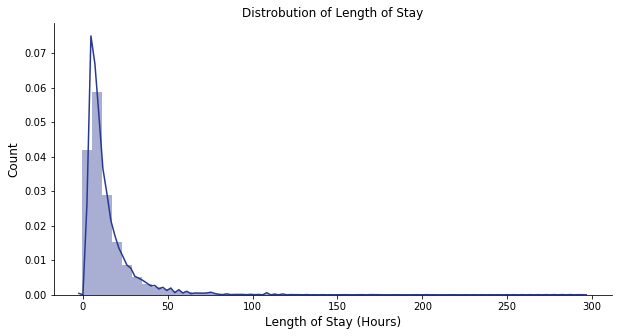

In [13]:
bidmc_deep_blue = '#283891'

plt.figure(figsize=(10,5))
los_distro = sns.distplot(clean_data.los, color=bidmc_deep_blue)
    
los_distro.set_title('Distrobution of Length of Stay', fontsize=12)
los_distro.set_ylabel('Count', fontsize=12)
los_distro.set_xlabel('Length of Stay (Hours)', fontsize=12);
sns.despine()

In [14]:
#focusing model on only short-term stays
clean_data = clean_data[clean_data.los <= 30]
clean_data = clean_data[clean_data.los > 0]

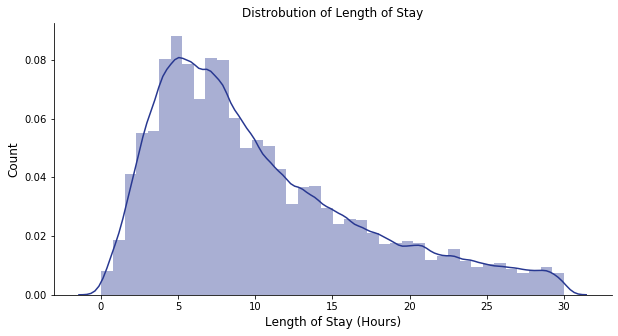

In [15]:
bidmc_deep_blue = '#283891'

plt.figure(figsize=(10,5))
los_distro = sns.distplot(clean_data.los, color=bidmc_deep_blue, bins=40)
    
los_distro.set_title('Distrobution of Length of Stay', fontsize=12)
los_distro.set_ylabel('Count', fontsize=12)
los_distro.set_xlabel('Length of Stay (Hours)', fontsize=12);
sns.despine()

## Correlations

Lorem ipsum: info about why this isn't a pairplot / heat map

In [16]:
#grouping by hadm_id to ensure each visit is counted individually 
grped_per_vis = clean_data.groupby('hadm_id').max().reset_index()

### Admission Type

In [17]:
grped_per_vis.admission_type.unique()

array(['EMERGENCY', 'ELECTIVE', 'URGENT', 'NEWBORN'], dtype=object)

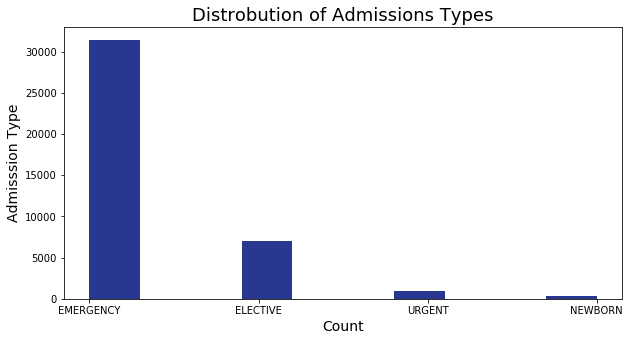

In [18]:
hist_plots(grped_per_vis.admission_type, 'Distrobution of Admissions Types', xaxis='Admisssion Type', yaxis='Count')

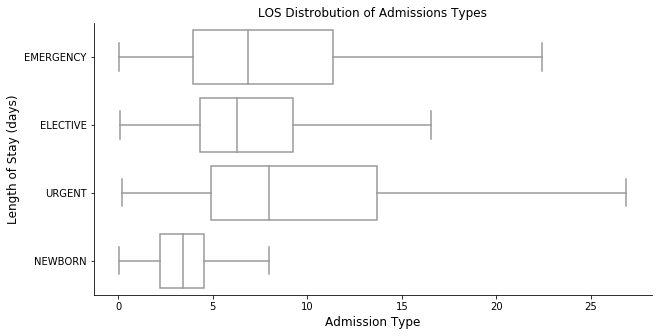

In [31]:
boxplots(x=grped_per_vis.los, y=grped_per_vis.admission_type, title='LOS Distrobution of Admissions Types', xaxis='Length of Stay (days)', yaxis='Admission Type')

## Admission Location

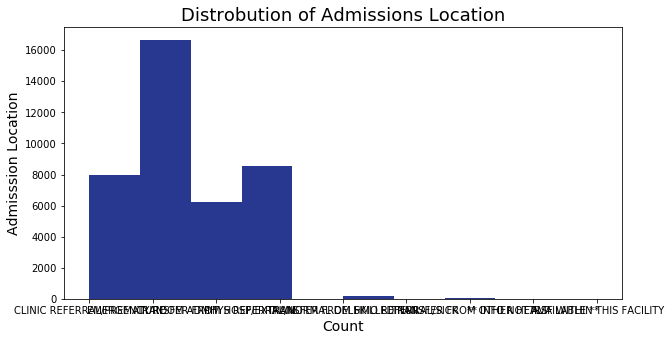

In [34]:
hist_plots(grped_per_vis.admission_location, 'Distrobution of Admissions Location', xaxis='Admisssion Location', yaxis='Count')

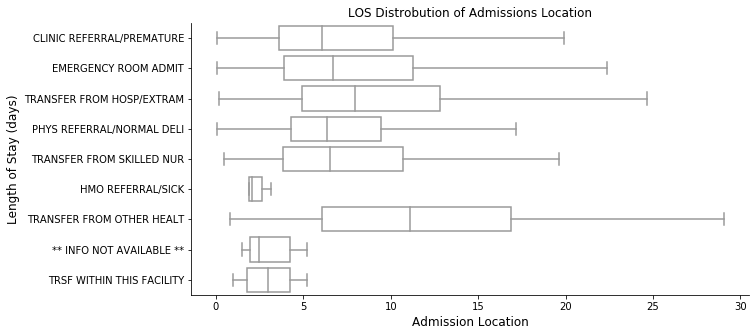

In [33]:
boxplots(x=grped_per_vis.los, y=grped_per_vis.admission_location, title='LOS Distrobution of Admissions Location', xaxis='Length of Stay (days)', yaxis='Admission Location')